# Visualizing Crimes Data with Law Enforcement Data and Income Data

- We have statistics about California counties. One way we can compare these values among counties is with scatter charts.
- We will use matplotlib to generate our chart.

In [63]:
%matplotlib inline
#Makes matplotlib render in Juppyter notebook

#Importing modules needed for data handling and visualization
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.axes as axes
import datetime
import numpy as np
import re


- When we want only care about certain categories in the data, we can just pull data by column headers. This is the function of `Pick_Column()` below.
- We want to store that filtered data as a new DataFrame that can be fed directly into a graphing function, such as `matplotlib`.

In [64]:
def Pick_Column(fname,columns):
    ''' 
    This function is used to pick up the column we need from the full data file.
    fname should be a string of the data file's name. columns should be a list 
    containing the requested column name(s) as a string.
    
    After asserting that all of the inputs are of the expected data type and
    that fname can be accessed, fname is read into a pandas DataFrame using
    pd.read_csv(). Then the requested columns are compared to the columns
    in the dataframe to make sure that they are all present.
    
    The columns listed are pulled and returned as a new DataFrame.
    
    :param fname: str, path to access desired CSV file
    :param columns: list of str, column(s) to access within the file
    :return: pandas DataFrame, the requested column(s) of data
    '''
    #Checking columns input
    assert(isinstance(columns,list)), "Column names should be provided as list."
    for c in columns:
        assert( isinstance(c, str) ), "{} is not a str".format(c)
        #columns should be a list of strings
    
    import os #will use to check whether the file works
    
    #Checking file name input
    assert(isinstance(fname,str)), "File name must be type str."
    assert(fname[-3:] == 'csv'), "File extension is not .csv"
    assert(os.path.exists(fname)), "File at %s cannor be found." % (fname)
    
    #Convert the csv into pandas dataframe
    data = pd.read_csv(fname, header=0)
    
    #Checking whether the requested columns are in the dataframe
    for co in columns:
        assert( co in data.columns ), \
              "%s is not a column in %s" % (co, fname)
    
    #Extract the desired data from the dataframe
    newdata = data[columns]
    return newdata

- In other cases, we want to compare data sets within or among a set of years. This is where we use `Pick_year()`.
- As before, the output will be a ready-to-use pandas DataFrame.

In [65]:
def Pick_year(fname,year):
    ''' 
    This function is used to select the data of a specific year from a data
    file. fname should be a string of the data's file name. year should be 
    a non-empty list containing the year(s) desired as integers.
    
    After asserting parameter data types and checking whether fname is a
    real file, pandas.read_csv() is used to load the CSV as a DataFrame.
    Then, the function checks that 'Year' is an available column in
    the DataFrame.
    
    Looping through each year, it checks whether each year is available in
    the data before adding all of the matching rows to a list of
    DataFrames.
    
    The DataFrames are concatenated together, and their index is reset to
    their position in the output data frame, starting with 0 and counting
    upward. Then the final data frame is returned as output.
    
    :param fname: str, file path of a CSV file
    :param year: list of int, years for which data is requested
    :return: pandas DataFrame, data rows from the year(s) requested
    '''
    #Checking the year input
    assert(isinstance(year,list)), "Year(s) must be input in a list."
    assert(len(year) > 0), "No years are listed."
    #This is a problem for the concatenate function later on.
    for yr in year:
        assert( isinstance(yr, int) ), "{} is not an int.".format(y)
    
    #Checking the file name input
    assert(isinstance(fname,str)), "File name input must be str."
    assert(fname[-3:] == 'csv'), "File name does not have a .csv extension."
    import os
    assert(os.path.exists(fname)), "File named %s not found" % (fname)
    
    #Load CSV as a pandas dataframe
    df = pd.read_csv(fname, header=0)
    #Check that the year can be accessed in the dataframe
    assert('Year' in df.columns), "Year not found as a column header"
    
    l = [] #start a list to store rows of data
    
    for y in year: #going through each year listed
        #Check that the dataframe has each year requested
#         assert(y in df['Year']), "Year {0} not found in {1}".format(y,fname)
        #Add the rows for each year to the total list
        data = df[df[u'Year'] == y]
        l.append(data)
    
    result = pd.concat(l) #Combine the collected dataframes for the output
    result.index = range(len(result)) #reset the index
    return result

- Our data from [Governing.com](http://www.governing.com/gov-data/safety-justice/law-enforcement-police-department-employee-totals-for-cities.html) contains data from police stations and counties across the U.S.
- We want to filter out anything not from California, but we'll leave that as a default so the function can be used for any state.
- Looking at specific police departments is important for our analysis of the relationship between the number of police and the amount of crime in an area.

In [66]:
def Pick_by_Police_Department(fname, state='California'):
    ''' 
    This function is used to pick up the data of one state's police departments from the 
    full data file of police departments from across the US. fname should be a string of
    the data file's name. state should be a string of the state's name. The default
    state is California, since that is the focus of our project.
    
    After asserting that the parameters are of the correct data type, the CSV file is
    translated and stored as a pandas DataFrame.
    
    The function asserts that there is column with the header "Police_Department" in
    the data frame read from the CSV. Then it pulls all of the rows with the requested
    state name under Police_Department as another DataFrame. It will return an error
    if empty, saying that there was no data for the specified state.
    
    The index on the output dataframe is converted to the default counting up from 0.
    The resulting dataframe is returned as output.
    
    :param fname: str, file path of a CSV file
    :param state: str, default = 'California', state for which data should be pulled
    :return: pandas DataFrame, every row with data pertaining to the state given
    '''
    #checking the state name input
    assert(isinstance(state,str)), "State must be input as str."
    #Checking the file name input
    assert(isinstance(fname,str)), "File name input must be str."
    assert(fname[-3:] == 'csv'), "File name does not have a .csv extension."
    import os
    assert(os.path.exists(fname)), "File named %s not found" % (fname)
    
    #Store in the CSV as a data frame
    df = pd.read_csv(fname, header=0)
    #Check that the data is sorted by police department
    assert("Police_Department" in df.columns), \
          "{} does not have Police_Department as a column heading.".format(fname)
    #Pull out all rows with "state name" in the Police_Department column
    l = []
    data = df[df.Police_Department.str.contains(state)]
    #Check if the result is empty, which would mean a lack of data for the state
    assert( len(data) > 0 ), "No entries could be found for %s." % (state)
    l.append(data)
    result = pd.concat(l)
    result.index = range(len(result)) # reset the index
    return result

**Function Shortcuts**

We've renamed some of the pandas functions to make remembering them easier and keep the input parameters consistent while generating plots.

`Delete_Column(data,columns)`: Uses `.drop()` to remove columns by providing `axis=1` as an argument.

`Change_index(df, column)`: Uses `.tolist()` to change the dataframe's index to a specified column.

`Save_to_csv(data, fname)`: Uses `.to_csv()` to save a CSV file without its index values.

`Save_to_csv_with_index(data, wfname)`: Uses `.to_csv()` to save a CSV file with its index values by inputting `index=True`.

In [67]:
def Delete_Column(data,columns):
    ''' 
    This function is used to delete the column we don't need from the full data file.
    data should be in pandas DataFrame. columns should be a list containing the column's
    name as a string
    '''
    assert(isinstance(columns,list))
    newdata = data.drop(columns, axis = 1)
    return newdata

def Change_index(df, column):
    ''' 
    This function is used to change the index to one column in Pandas DataFrame.
    data should be the pandas DataFrame. columns should be a string of the column's 
    name which we want to use as index
    '''    
    assert(isinstance(column,str))
    df.index = df[column].tolist()
    return df

def Save_to_csv(data, wfname):
    '''
    This function is used to export csv file from pandas DataFrame.
    wfname should be a string of the file's name you want for the data. 
    data should be the pandas DataFrame which you want to save into csv.
    index == False, it will not save index. index == Ture, it will save index.
    '''
    assert(isinstance(wfname,str))
    assert(wfname[-3:] == 'csv')
    data.to_csv(wfname,index=False)
    
def Save_to_csv_with_index(data, wfname):
    '''
    This function is used to export csv file from pandas DataFrame.
    wfname should be a string of the file's name you want for the data. 
    data should be the pandas DataFrame which you want to save into csv.
    index == False, it will not save index. index == Ture, it will save index.
    '''
    assert(isinstance(wfname,str))
    assert(wfname[-3:] == 'csv')
    data.to_csv(wfname,index=True)

**Quick Data Summaries**

- We've specified some `lambda` functions that will give us the sums over the rows or columns of our data.
- This is useful, since matplotlib does not process summary statistics natively in its language.

In [68]:
def Row_Sum(df,column):
    '''
    This function is used to calculate the sum across rows in a pandas DataFrame.
    df should be the pandas DataFrame which you want to calculate the Row_Sum.
    Column should be a string as a index of Row_Sum. Note, data in df should be
    float or int.
    '''    
    assert(isinstance(column,str))
    df.loc[column] = df.apply(lambda x: x.sum())
    return df
    
def Col_Sum(df):
    '''
    This function is used to calculate the sum of datas in every column in 
    each rows in pandas DataFrame.df should be the pandas DataFrame which 
    you want to calculate the Col_Sum.
    '''    
    df['Col_sum'] = df.apply(lambda x: x.sum(), axis=1)
    return df

----

# Filtering data sets

To make our dataframes less unweildy, we are extracting just the rows and columns that interest us. This primarily consists of searching for locations in California from within the last couple years.

In [69]:
fname = 'Crimes_data.csv'
columns = ['Year','County','Violent_sum','Property_sum']
a = Pick_Column(fname,columns)
data = a
wfname = 'Yearly_County_Violent_Property_Sum.csv'
Save_to_csv(data, wfname)

In [70]:
fname ='Crimes_data.csv'
year = [2016]
a = Pick_year(fname,year)
data = a
wfname = '2016_Crimes_data.csv'
Save_to_csv(data, wfname)

In [71]:
fname =  'Yearly_County_Violent_Property_Sum.csv'
year = [2016]
a = Pick_year(fname,year)
data = a
wfname = '2016_County_Violent_Property_Sum.csv'
Save_to_csv(data, wfname)

In [72]:
fname =  'police_data_2016.csv'
a = Pick_by_Police_Department(fname,)
data = a
wfname = 'police_data_2016_California.csv'
Save_to_csv(data, wfname)


In [73]:
fname = '2016_County_Violent_Property_Sum.csv'
data = pd.read_csv(fname, header=0)
columns = ['Year','County']
df = Delete_Column(data,columns)
column = 'Violent_sum'
# Change_index(df, column)
# Row_Sum(df,column)

In [74]:
fname = 'police_data_2016_California.csv'
columns = ['Police_Department','Officers','Population']
a = Pick_Column(fname,columns)
data = a
wfname = 'police_data_2016_California_Officers_Total_Num.csv'
Save_to_csv(data, wfname)

In [75]:
def Find_County_of_Police_Departmen(Crimefile,Policefile):
    ''' 
    This function identifies which county in which the police departments in 
    Policefile are located. Basically, this is accomplished by comparing the
    NCICCode in the Crimefile to those in the Policefile. Crimefile and
    Policefile should be a string of the data file's name. 
    
    :param Crimefile: str, file with crime statistics for counties
    :param Policefile: str, file with police employment statistics
    :return: pandas DataFrame, data set with locations for each department
    '''
    assert(isinstance(Crimefile,str))
    assert(isinstance(Policefile,str))
    assert(Crimefile[-3:] == 'csv')
    assert(Policefile[-3:] == 'csv')
    
    dfcrime = pd.read_csv(Crimefile, header=0)
    dfpolice = pd.read_csv(Policefile, header=0)

    dep = []
    for department in dfpolice[u'Police_Department']:
        department = department.rstrip(' California')
        department = department.replace(',','')
        dep.append(department)
    # dep is the list of police department's name without state's name

    area = []
    i = 0
    for d in dep: # d is one police department's name
        A = dfcrime[(dfcrime.NCICCode.str.contains(d))] 
        # A is a Pandas DataFrame of data that the context of NCICCode include d(police department's name)
        # That means this police department is responsible for these NCICCode Areas
        Countyname = []
        for cn in A[u'County']:
            if cn not in Countyname:
                Countyname.append(cn)
        Countyname = Countyname[0]

        Policedepartment = dfpolice[dfpolice.Police_Department.str.contains(d)]
        Policedepartment['County'] = Countyname
        area.append(Policedepartment)

    Policedepartment = pd.concat(area)
    Policedepartment.sort_values(by='County',ascending=True)      
    return Policedepartment


In [76]:
Crimefile = '2016_Crimes_data.csv'
Policefile =  'police_data_2016_California_Officers_Total_Num.csv'
data = Find_County_of_Police_Departmen(Crimefile,Policefile)
wfname = 'Police_department_with_County.csv'
Save_to_csv(data, wfname)

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [77]:
def Police_data_by_county(fname):
    '''
    This function is used to calculate the total numbers of officers and population
    in a county. fname should be a string of the data file's name.
    
    :param fname: str, file containing data on officer employment and population
    '''
    assert(isinstance(fname,str))
    assert(fname[-3:] == 'csv')
    
    df = pd.read_csv(fname, header=0)
    rx = re.compile(',|-') #creating a regular expression including the invalid characters.
    df['Officers'] = pd.DataFrame({'Officers': [rx.sub(r'', i) if rx.sub(r'', i) else 0 for i in df[u'Officers']]},dtype=np.float64)

    Countyname = []
    Sumdata = []
    for cn in df[u'County']:
        if cn not in Countyname:
            Countyname.append(cn)

    for countyname in Countyname:
        data = df[df[u'County'] == countyname]
        columns = ['Police_Department','County']
        newdata = Delete_Column(data,columns)

        sumdata = Row_Sum(newdata,countyname)
        sumbycounty = pd.DataFrame(sumdata.iloc[-1]).T
        Sumdata.append(sumbycounty)

    Officers_Population_by_County= pd.concat(Sumdata)
    Officers_Population_by_County.index.names=['County']
    return Officers_Population_by_County

In [87]:
##### Police_department_with_County.csv need to upload to Jupyter
fname = 'Police_department_with_County.csv'
Police_data_by_county_sum = Police_data_by_county(fname)
Pdata = Police_data_by_county_sum
wfname = 'Police_data_by_county.csv'
Save_to_csv_with_index(Pdata, wfname)

In [79]:
def Crime_data_by_county(fname):
    '''
    This function is used to calculate the totally numbers of Violent and Property crimes
    in a county. fname should be a string of the data file's name. 
    '''
    assert(isinstance(fname,str))
    assert(fname[-3:] == 'csv')

    df = pd.read_csv(fname, header=0)
    Countyname = []
    Sumdata = []
    for cn in df[u'County']:
        if cn not in Countyname:
            Countyname.append(cn)

    for countyname in Countyname:
        data = df[df[u'County'] == countyname]
        columns = ['Year','County']
        newdata = Delete_Column(data,columns)
        sumdata = Row_Sum(newdata,countyname)
        sumbycounty = pd.DataFrame(sumdata.iloc[-1]).T
        Sumdata.append(sumbycounty)

    Crimes_by_County= pd.concat(Sumdata)
    Crimes_by_County.index.names=['County'] ## give index a name
    return Crimes_by_County

In [80]:
fname = '2016_County_Violent_Property_Sum.csv'
Crime_data_by_county_sum = Crime_data_by_county(fname)
Cdata = Crime_data_by_county_sum
wfname = 'Crime_data_by_county.csv'
Save_to_csv_with_index(Cdata, wfname)

In [81]:
def Merge_two_dataset(Crimefile,Policefile):
    '''
    This function is used to merge two dataset by county. Crimefile and Policefile 
    should be a string of the data file's name. 
    '''
    assert(isinstance(Crimefile,str))
    assert(isinstance(Policefile,str))
    assert(Crimefile[-3:] == 'csv')
    assert(Policefile[-3:] == 'csv')
    
    dfcrime = pd.read_csv(Crimefile, header=0)
    dfpolice = pd.read_csv(Policefile, header=0)

    Countyname = []
    Sumdata = []
    for cn in dfpolice[u'County']:
        if cn not in Countyname:
            Countyname.append(cn)

    Datalist = []
    for countyname in Countyname:
        datacrime = dfcrime[dfcrime[u'County'] == countyname]
        Change_index(datacrime, 'County')
    #     print type(datapolice[1:2])
    #     print datapolice[1:2]
    #     print datacrime
        datapolice = dfpolice[dfpolice[u'County'] == countyname]
        Change_index(datapolice, 'County')
    #     print type(datapolice)
    #     datapolice['Violent_sum'] = Series.as_matrix(datacrime[u'Violent_sum'])[0]
    #     Data.append[datapolice]
        Data = pd.concat([datacrime,datapolice],axis=1)
        Data = Delete_Column(Data,['County','Population'])
        Datalist.append(Data)


    DATA = pd.concat(Datalist)
    return DATA


In [82]:
Crimefile = 'Crime_data_by_county.csv'
Policefile =  'Police_data_by_county.csv'
DATA = Merge_two_dataset(Crimefile,Policefile)
wfname = 'Crime_Police_by_county.csv'
Save_to_csv_with_index(DATA, wfname)

----

# Analysis of data sets and visualiation

We are trying to figure out what are the potentially reasons that may effect the crime rate. At the same time, we wonder how the number of police officer will effect the crime rate.

#### Relationship between Average Income of counties and Crimes rate：

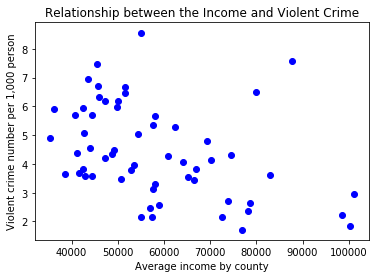

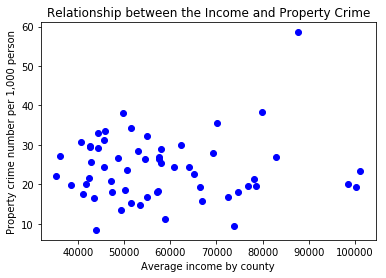

In [83]:
fname = 'Data USA - Geo Map of Income by Location in California.csv'
year = [2016]
df = Pick_year(fname,year)
df = df.rename(columns={'geo_name': 'County'})
df = Delete_Column(df,['geo','Year'])
Crimedata = pd.read_csv('Crime_data_by_county_per.csv',header=0)
l = []
for c in Crimedata[u'County']:
    d = df[df.County.str.contains(c)]
    b = Crimedata[Crimedata.County.str.contains(c)]
    add = [b, d]
    a = pd.concat(add,axis=1)
    l.append(a)
Data = pd.concat(l)
Data = Delete_Column(Data,['County','Violent_sum','Property_sum','Total Population'])
Data

fig = plt.figure()
plt.scatter(Data.income,Data.Violent_Crime_per1k,color='b')
plt.xlabel('Average income by county')
plt.ylabel('Violent crime number per 1,000 person')
plt.title('Relationship between the Income and Violent Crime')
fig.savefig('Relationship between the Income and Violent Crime.png',dpi=600)

fig = plt.figure()
plt.scatter(Data.income,Data.Property_Crime_per1k,color='b')
plt.xlabel('Average income by county')
plt.ylabel('Property crime number per 1,000 person')
plt.title('Relationship between the Income and Property Crime')
fig.savefig('Relationship between the Income and Property Crime.png',dpi=600)

#### Relationship between the number of police officer and Crimes rate：

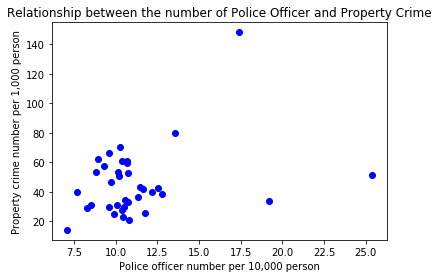

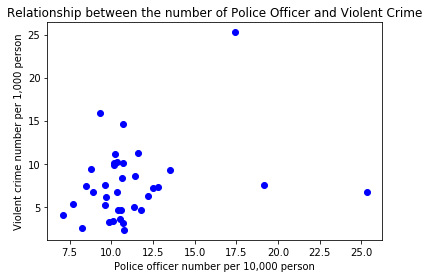

In [84]:
##### Crime_Police_by_county_per.csv need to upload to Jupyter
Data = pd.read_csv('Crime_Police_by_county_per.csv', header=0)
# Data = Data.loc[0:4] #### the rows will plot
Change_index(Data, 'County') ### change county into index, so it will on the horizontal coordinate
Data = Delete_Column(Data,['County']) ### delete the county column
Data.index.names=[u'County'] ## give index a name

Data = Data.sort_values(by=['Violent_Crime_per1K'])  

fig = plt.figure()
plt.scatter(Data.Officers_per10K,Data.Property_Crime_per1K,color='b')
plt.ylabel('Property crime number per 1,000 person')
plt.xlabel('Police officer number per 10,000 person')
plt.title('Relationship between the number of Police Officer and Property Crime')
fig.savefig('Relationship between the number of Police Officer and Property Crime.png',dpi=600)

fig = plt.figure()
plt.scatter(Data.Officers_per10K,Data.Violent_Crime_per1K,color='b')
plt.ylabel('Violent crime number per 1,000 person')
plt.xlabel('Police officer number per 10,000 person')
plt.title('Relationship between the number of Police Officer and Violent Crime')
fig.savefig('Relationship between the number of Police Officer and Violent Crime.png',dpi=600)

#### Top 5 safest counties and Top 5 the most insecure counties:

In [85]:
##### Crime_Police_by_county_per.csv need to upload to Jupyter
Data = pd.read_csv('Crime_Police_by_county_per.csv', header=0)
Data = Delete_Column(Data,['Violent_Crime_per1K','Officers_per10K']) ### delete the county column
Data = Data.sort_values(by=['Property_Crime_per1K'])  
Data.index = range(len(Data))

County_lowProCri = Data.loc[0:4]
bestranking = pd.DataFrame({" ": [1, 2, 3, 4, 5]})

County_highProCri = Data.loc[31:35]
County_highProCri = County_highProCri.sort_values(by=['Property_Crime_per1K'],ascending=False)  
County_highProCri.index = range(len(County_highProCri))
badranking = pd.DataFrame({" ": [1, 2, 3, 4, 5]})

add = [bestranking, County_lowProCri,badranking,County_highProCri]
pd.concat(add,axis=1)


,,County,Property_Crime_per1K,,County,Property_Crime_per1K
0,1,San Benito County,14.278889,1,Humboldt County,148.122128
1,2,San Mateo County,21.160693,2,Santa Cruz County,79.703726
2,3,Kings County,22.911657,3,Kern County,70.748477
3,4,Santa Clara County,25.340764,4,Riverside County,66.297830
4,5,San Diego County,25.995186,5,Butte County,61.987686


In [86]:
##### Crime_Police_by_county_per.csv need to upload to Jupyter
Data = pd.read_csv('Crime_Police_by_county_per.csv', header=0)
Data = Delete_Column(Data,['Property_Crime_per1K','Officers_per10K']) ### delete the county column
Data = Data.sort_values(by=['Violent_Crime_per1K'])  
Data.index = range(len(Data))

County_lowProCri = Data.loc[0:4]
bestranking = pd.DataFrame({" ": [1, 2, 3, 4, 5]})

County_highProCri = Data.loc[31:35]
County_highProCri = County_highProCri.sort_values(by=['Violent_Crime_per1K'],ascending=False)  
County_highProCri.index = range(len(County_highProCri))
badranking = pd.DataFrame({" ": [1, 2, 3, 4, 5]})

add = [bestranking, County_lowProCri,badranking,County_highProCri]
pd.concat(add,axis=1)


,,County,Violent_Crime_per1K,,County,Violent_Crime_per1K
0,1,San Mateo County,2.321666,1,Humboldt County,25.248511
1,2,Placer County,2.566054,2,Madera County,15.872000
2,3,Marin County,3.146157,3,Shasta County,14.554184
3,4,Santa Clara County,3.211042,4,San Joaquin County,11.187423
4,5,Orange County,3.395492,5,Kern County,11.139030
